Regression Example with SGDRegressor in Python
    Applying the Stochastic Gradient Descent (SGD) method to the linear classifier or regressor provides the efficient estimator for classification and regression problems. 

    Scikit-learn API provides the SGDRegressor class to implement SGD method for regression problems. The SGD regressor applies regularized linear model with SGD learning to build an estimator. A regularizer is a penalty (L1, L2, or Elastic Net) added to the loss function to shrink the model parameters. The SGD regressor works well with large-scale datasets. 



    In this tutorial, we'll briefly learn how to fit and predict regression data by using Scikit-learn's SGDRegressor class in Python. The tutorial covers:
Preparing the data
Training the model
Predicting and accuracy check
Boston dataset prediction
Source code listing
   We'll start by loading the required libraries.

In this tutorial, we'll briefly learn how to fit and predict regression data by using Scikit-learn's SGDRegressor class in Python. The tutorial covers:   

1. Preparing the data  

2. Training the model   

3. Predicting and accuracy check  

4. Boston dataset prediction  

5. Source code listing  




Loading the required libraries. 

In [1]:
from sklearn.linear_model import SGDRegressor
from sklearn.datasets import load_boston
from sklearn.datasets import make_regression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import scale
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd

### Preparing the data

In [2]:
# Generate random regression data with make_regression() function. The dataset contains 30 features and 1000 samples

In [3]:
x, y = make_regression(n_samples=1000, n_features=30)

In [4]:
x.shape , type(x)

((1000, 30), numpy.ndarray)

In [5]:
y.shape , type(y)

((1000,), numpy.ndarray)

To improve the model accuracy we'll scale both x and y data then, split them into train and test parts. Here, we'll extract 15 percent of the samples as test data.

In [6]:
x = scale(x)
y = scale(y)
xtrain, xtest, ytrain, ytest=train_test_split(x, y, test_size=0.15)

Training the model

Next, we'll define the regressor model by using the SGDRegressor class. Here, we can use default parameters of the SGDRegressor class.

In [7]:
sgdr = SGDRegressor()
print(sgdr)


SGDRegressor()


Fit the model on train data and check the model accuracy score.


(method) score: (X: Any, y: Any, sample_weight: Any | None = None) -> (float | Any)    
Return the coefficient of determination of the prediction.   

The coefficient of determination R^2 is defined as (1 - \frac{u}{v}), where u is the residual sum of squares ((y_true - y_pred)** 2).sum() and v is the total sum of squares ((y_true - y_true.mean()) ** 2).sum(). The best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse). A constant model that always predicts the expected value of y, disregarding the input features, would get a R^2 score of 0.0.    
 
Parameters    
X : array-like of shape (n_samples, n_features)       
    Test samples. For some estimators this may be a precomputed kernel matrix or a list of generic objects instead with shape (n_samples, n_samples_fitted), where n_samples_fitted is the number of samples used in the fitting for the estimator.     
 
y : array-like of shape (n_samples,) or (n_samples, n_outputs)    
    True values for X.    
 
sample_weight : array-like of shape (n_samples,), default=None    
    Sample weights.    

Returns    
score : float   
    R^2 of self.predict(X) wrt. y.    

Notes    
The R^2 score used when calling score on a regressor uses multioutput='uniform_average' from version 0.23 to keep consistent with default value of ~sklearn.metrics.r2_score. This influences the score method of all the multioutput regressors (except for ~sklearn.multioutput.MultiOutputRegressor).    



In [8]:
sgdr.fit(xtrain, ytrain)

score = sgdr.score(xtrain, ytrain)
print("R-squared:", score)

R-squared: 0.9999998945365888


We can also apply a cross-validation method to the model and check the training accuracy. 

In [9]:

cv_score = cross_val_score(sgdr, x, y, cv = 10)
print("CV mean score: ", cv_score.mean())




CV mean score:  0.9999999391423137


In [10]:
# Predicting and accuracy check

In [11]:
#  Now, we can predict the test data by using the trained model. 
# We can check the accuracy of predicted data by using MSE and RMSE metrics.

In [12]:
ypred = sgdr.predict(xtest)

In [13]:
mse = mean_squared_error(ytest, ypred)

In [14]:
print("MSE: ", mse)

MSE:  1.456990675512587e-07


In [15]:
print("RMSE: ", mse**(0.5)) 

RMSE:  0.00038170547225741826


Finally, we'll visualize the original and predicted data in a plot.

In [16]:
x_ax = range(len(ytest))
x_ax

range(0, 150)

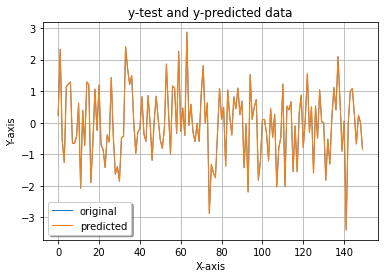

In [17]:
plt.plot(x_ax, ytest, linewidth=1, label="original")
plt.plot(x_ax, ypred, linewidth=1.1, label="predicted")
plt.title("y-test and y-predicted data")
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show() 

Boston housing dataset prediction

We'll apply the same method we've learned above to the Boston housing price regression dataset. 
We'll load it by using load_boston() function, scale and split into train and test parts.  
Then, we'll define model by changing some of the parameter values, check training accuracy, and predict test data.

We'll apply the same method we've learned above to the Boston housing price regression dataset.   
We'll load it by using load_boston() function, scale and split into train and test parts.    
Then, we'll define model by changing some of the parameter values, check training accuracy, and predict test data.   

In [18]:
print("Boston housing dataset prediction.")
boston = load_boston()

Boston housing dataset prediction.


c:\ProgramData\Anaconda_3\envs\myenv\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housin

In [19]:
boston

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [20]:
x, y = boston.data, boston.target

In [21]:
x = scale(x)
y = scale(y)

In [22]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=.15)

In [23]:
sgdr = SGDRegressor(alpha=0.0001, epsilon=0.01, eta0=0.1,penalty='elasticnet')

In [24]:
sgdr.fit(xtrain, ytrain)

SGDRegressor(epsilon=0.01, eta0=0.1, penalty='elasticnet')

In [25]:
score = sgdr.score(xtrain, ytrain)
print("R-squared:", score)

R-squared: 0.7232921090036131


In [36]:
# cv_score = cross_val_score(sgdr, x, y, cv=5)
cv_score = cross_val_score(sgdr, x, y, cv=10, scoring='neg_mean_absolute_error')
print("CV mean score: ", cv_score.mean())


CV mean score:  -0.4319093766210905


In [37]:
cv_score

array([-0.24385155, -0.31009793, -0.32598177, -0.47760344, -0.50443038,
       -0.34743185, -0.28529751, -1.02797471, -0.51998795, -0.27643668])

In [27]:
ypred = sgdr.predict(xtest)

In [28]:
mse = mean_squared_error(ytest, ypred)

In [29]:
print("MSE: ", mse)
print("RMSE: ", mse**(0.5))

MSE:  0.20467330398064879
RMSE:  0.45240833765598176


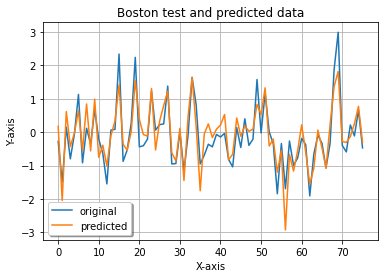

In [30]:
x_ax = range(len(ytest))
plt.plot(x_ax, ytest, label="original")
plt.plot(x_ax, ypred, label="predicted")
plt.title("Boston test and predicted data")
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show()

In [31]:
print("R-squared:", score)
print("MSE: ", mse)
print("RMSE: ", mse**(0.5)) 

R-squared: 0.7232921090036131
MSE:  0.20467330398064879
RMSE:  0.45240833765598176
